# Main

 This analysis is for *South Australia*
 

## Imports

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import ancil_load
import ancil_graph
import datetime
import datetime as dt
ancil_load=reload(ancil_load)
ancil_graph=reload(ancil_graph)

In [154]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

# load prices and power

In [159]:
df_all_ancil,price = ancil_load.SA_production_price()
df_all_ancil["index"]=df_all_ancil.index
df_all_ancil=df_all_ancil.drop_duplicates("index")
df_all_ancil=df_all_ancil.drop("index",axis=1)
#df_all_ancil=df_all_ancil.fillna(0)

price=pd.DataFrame(price)
price["index"]=price.index
price=price.drop_duplicates("index")
price=price.drop("index",axis=1)
#price=pd.Series(price)
price=price.iloc[1::2,0]

# Correlation filter Analysis Price

In [160]:
percentile = [100,1,5,10,60,80,90,95,99]
price_p=[]
for c in percentile:
    price_p.append(np.percentile(np.array(price.dropna()),c))



In [168]:
percentile[8]

99

In [161]:
# Some type of loop below?

## remove site from after 2013

In [162]:
df_all_ancil=df_all_ancil[["HALLWF1","CLEMGPWF","HALLWF2","LKBONNY2","LKBONNY3","SNOWTWN1","WATERLWF","NBHWF1","BLUFF1","SNOWSTH1"]]

HALLWF1
HALLWF2
WATERLWF
LKBONNY3
LKBONNY2
BLUFF1
NBHWF1
SNOWTWN1
SNOWSTH1
CLEMGPWF


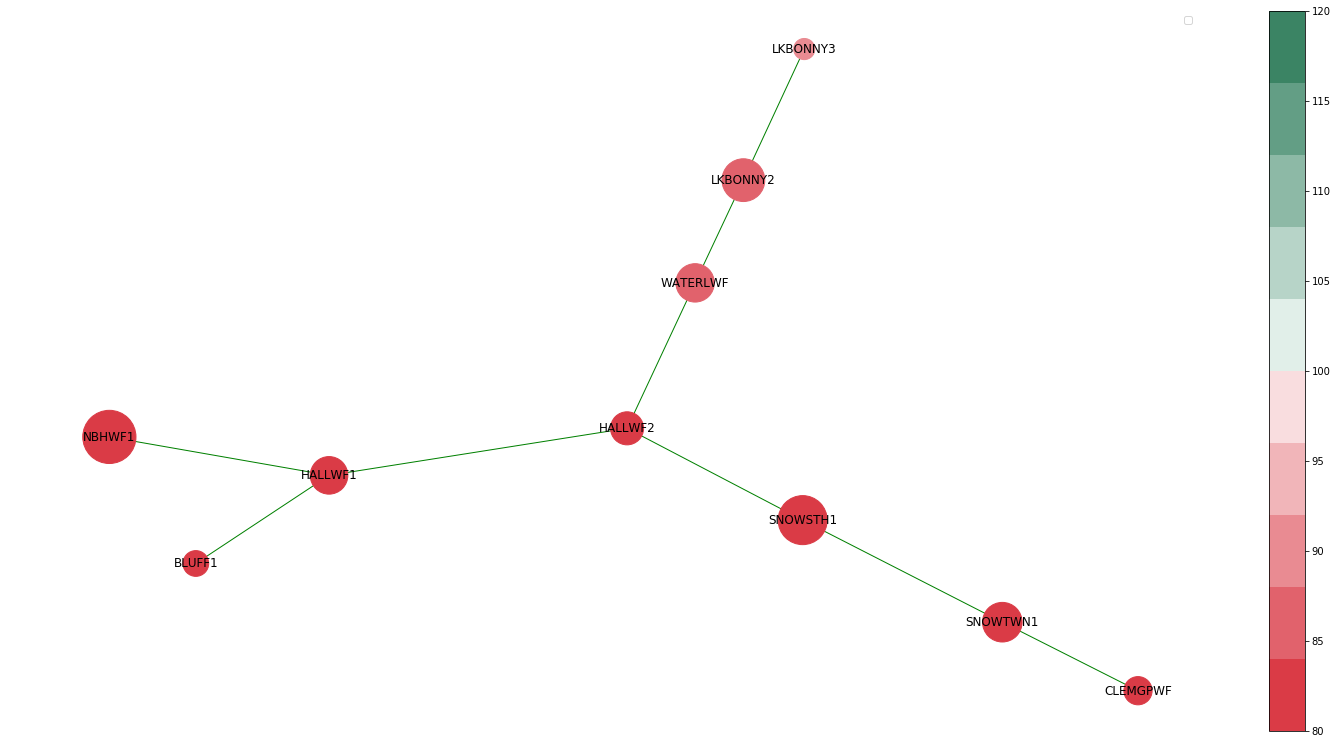

<Figure size 1440x1296 with 0 Axes>

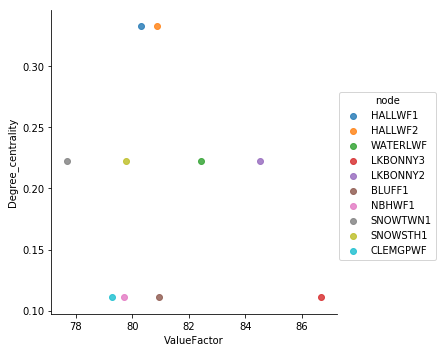

<Figure size 1440x1296 with 0 Axes>

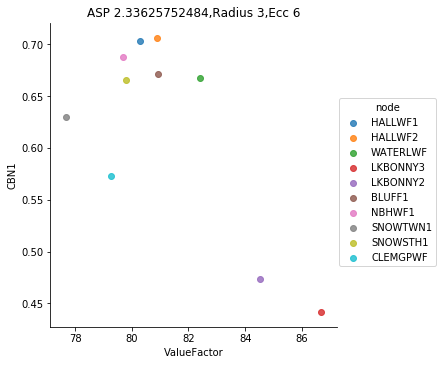

<Figure size 1440x1296 with 0 Axes>

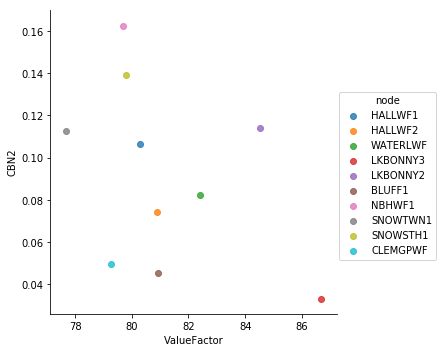

<Figure size 1440x1296 with 0 Axes>

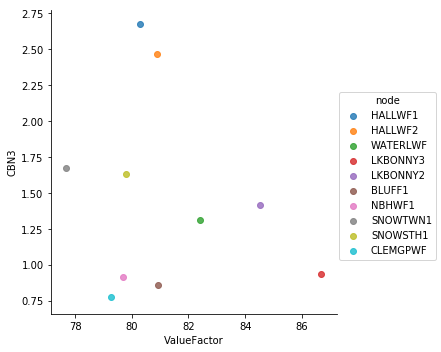

<Figure size 1440x1296 with 0 Axes>

<Figure size 457.125x360 with 0 Axes>

In [228]:
# tm= dt.datetime(2017,6,1)
# tstart=tm - dt.timedelta(days=180)
# tstart2=tm + dt.timedelta(days=180)

tstart= dt.datetime(2010,1,1)
tstart2=dt.datetime(2018,1,1)

for i in range(0,1):
    
    
    price = price.loc[datetime.datetime(2014,1,1):datetime.datetime(2018,7,1)]
    S_price=price.dropna()[price.dropna()<price_p[i]]
    df_all=df_all_ancil.loc[S_price.index]



    # saving plots here
    outpath="/mnt/y/Code/Analysis/graph/Graph_figures/CBN_testing_filter/South Australia/price/historic/{0}/".format(percentile[i])
    mkdir_p(outpath)

    mkdir_p(outpath+"Degree_centrality/")
    mkdir_p(outpath+"CBN1/")
    mkdir_p(outpath+"CBN2/")
    mkdir_p(outpath+"CBN3/")
    mkdir_p(outpath+"CBS/")
    mkdir_p(outpath+"MST/")


    df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,S_price,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))

    asp=nx.average_shortest_path_length(G,weight="weight")
    radius=nx.radius(G)
    diam=nx.diameter(G)

    # STEP2 analytics.
    import matplotlib.pyplot as plt
    # Calculate dataframe of Analytics
    df_central=ancil_load.munge_analytics_MST(G,tstart)


    import seaborn as sns


    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
    f.savefig(outpath+"Degree_centrality/"+"degree.png")


    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN1",hue="node",fit_reg=False)
    # Add a title to the Figure
    f.ax.title=plt.title("hey")
    f.ax.title=plt.title("ASP {0},Radius {1},Ecc {2}".format(asp,radius,diam))
    f.savefig(outpath+"CBN1/"+"CBN1.png")


    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN2",hue="node",fit_reg=False)
    f.savefig(outpath+"CBN2/"+"CBN2.png")


    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN3",hue="node",fit_reg=False)
    f.savefig(outpath+"CBN3/"+"CBN3.png")

    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBS",hue="node",fit_reg=False)
    f.savefig(outpath+"CBS/"+"CBS.png")

    ################################### EXPERIMENTAL#####################
    # df=df_all_ancil-df_all_ancil.mean(axis=0)
    # u,s,v=np.linalg.svd(df)

    # PC1=v[:,0]
    # PC2=v[:,1]
    # PC3=v[:,2]

    # C1=np.dot(df,PC1)
    # C2=np.dot(df,PC2)
    # C3=np.dot(df,PC3)

    # PCA=pd.DataFrame({"PC1":C1,"PC2":C2,"PC3":C3},index=df.index)
    # PCA["gen"]=PCA.index
    # PCA["month"]=np.array(np.array(PCA.index.month))
    # PCA["day"]=np.array(np.array(PCA.index.day))

    # import seaborn as sns

    # # PCA1 Vs PC2
    # #sns.lmplot(data=PCA,x=`a"PC1",y="PC2",hue="gen",fit_reg=False)
    # import matplotlib.pyplot as plt
    # #fig, ax = plt.subplots()
    # sns.lmplot(data=PCA,x="PC1",y="PC2",col="month",fit_reg=False)

    plt.clf()


In [177]:
price_p[2]

14.829999999999998

In [178]:
S_price

SETTLEMENTDATE
2014-01-01 04:00:00     -3.70
2014-01-01 05:00:00      6.47
2014-04-21 13:00:00    -14.19
2014-04-24 03:00:00     12.45
2014-04-24 04:00:00      5.31
2014-06-23 02:00:00      8.61
2014-06-24 04:00:00     14.44
2014-07-16 13:00:00     12.94
2014-07-17 02:00:00     -3.90
2014-07-17 03:00:00      6.86
2014-07-17 04:00:00      2.62
2014-07-17 05:00:00     11.45
2014-07-29 02:00:00      7.47
2014-07-29 03:00:00    -10.19
2014-07-29 04:00:00    -12.69
2014-07-29 05:00:00     -9.18
2014-07-29 06:00:00     11.46
2014-07-29 23:00:00     14.45
2014-07-30 23:00:00      9.38
2014-07-31 01:00:00      7.62
2014-07-31 02:00:00     10.67
2014-07-31 03:00:00      8.34
2014-07-31 04:00:00    -40.03
2014-07-31 05:00:00    -20.85
2014-07-31 06:00:00     12.62
2014-08-10 03:00:00     13.79
2014-08-10 04:00:00     14.64
2014-08-10 05:00:00     12.40
2014-08-10 06:00:00     13.11
2014-08-13 04:00:00     13.33
                        ...  
2017-09-27 04:00:00     13.97
2017-09-27 11:00:00      

In [176]:
df_all

,HALLWF1,CLEMGPWF,HALLWF2,LKBONNY2,LKBONNY3,SNOWTWN1,WATERLWF,NBHWF1,BLUFF1,SNOWSTH1
SETTLEMENTDATE,,,,,,,,,,
2014-01-01 04:00:00,89.03,49.80,66.20,121.00,15.13,77.76,83.91,101.06,52.16,66.48
2014-01-01 05:00:00,89.68,36.81,69.58,121.00,17.67,75.05,78.09,91.63,52.06,62.02
2014-04-21 13:00:00,85.27,45.37,57.50,37.51,7.99,88.52,107.50,121.92,50.19,81.09
2014-04-24 03:00:00,50.66,0.42,40.56,138.26,4.49,26.67,59.44,38.47,21.67,36.22
2014-04-24 04:00:00,51.80,0.00,39.88,133.07,0.00,19.11,54.45,44.24,30.66,28.42
2014-06-23 02:00:00,81.22,46.47,60.03,137.59,0.34,49.56,104.44,118.48,48.71,102.56
2014-06-24 04:00:00,86.08,47.33,40.77,121.00,11.02,90.34,90.45,124.52,49.51,108.30
2014-07-16 13:00:00,79.39,23.56,59.71,141.47,26.62,88.88,107.94,104.93,45.79,109.48
2014-07-17 02:00:00,86.46,41.48,62.01,118.47,22.24,67.82,108.41,125.34,50.84,111.86


In [222]:
g="BLUFF1"

In [223]:
v=(df_all[g]*price*.5).sum()/(df_all[g].sum()*.5)

In [224]:
S_price.mean()

-28.836090534979423

In [225]:
v

-24.261451242467576

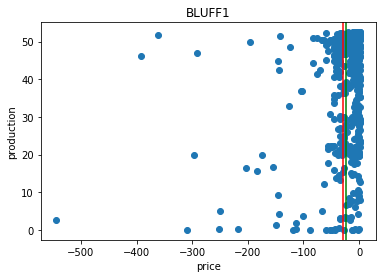

In [226]:
plt.plot(np.array(S_price),np.array(df_all[g]),'o')
plt.title(g)
plt.xlabel("price")
plt.ylabel("production")
plt.axvline(x=np.array(S_price).mean(),c="red")
plt.axvline(x=v,c="green")

In [179]:
g="WATERLWF"
v=ancil_graph.vf(df_all,g,S_price)

In [ ]:
# Total wind in system by total by price

# unflitered


Text(0,0.5,'Price')

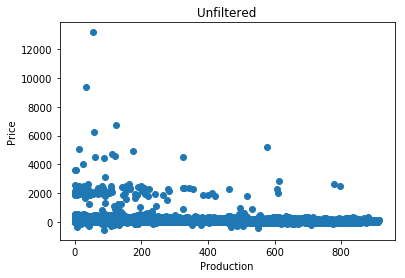

In [229]:
plt.plot(np.array(df_all.sum(axis=1)),np.array(S_price),'o')
plt.title("Unfiltered")
plt.xlabel("Production")
plt.ylabel("Price")
# plt.axvline(x=np.array(S_price).mean(),c="red")
# plt.axvline(x=v,c="green")

# Top 1 %

<IPython.core.display.Javascript object>


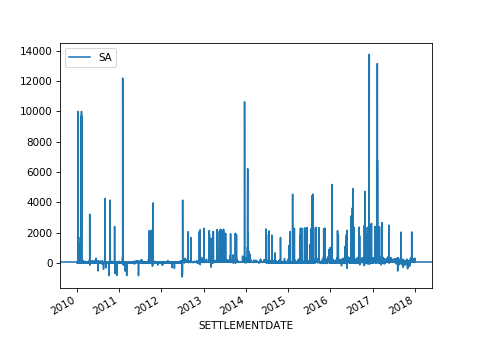

In [343]:
pd.DataFrame(price).plot()
plt.axhline(p)


# No price filtering

<IPython.core.display.Javascript object>


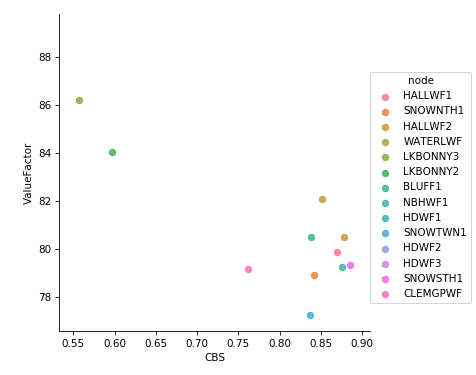

In [356]:
import seaborn as sns
sns.lmplot(data=df_central,x="CBS",y="ValueFactor",hue="node",fit_reg=False)

# When they come on

In [422]:
switchon=pd.DataFrame()
switchon["index"]=pd.Series(range(0,df_all_ancil.shape[0]))
switchon.index=df_all_ancil.index
for g in df_all_ancil.columns:
    
    a=df_all_ancil[g].dropna()
    switchon[g]=a

<IPython.core.display.Javascript object>


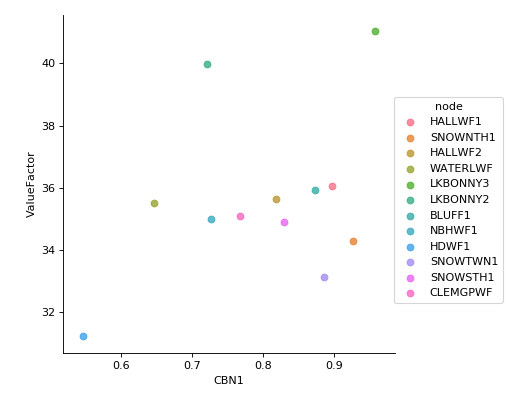

In [156]:
import seaborn as sns
sns.lmplot(data=df_central,x="CBN1",y="ValueFactor",hue="node",fit_reg=False)

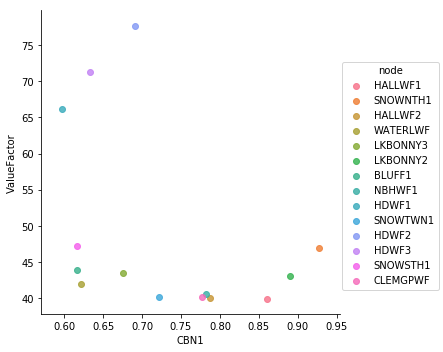

In [24]:
import seaborn as sns
sns.lmplot(data=df_central,x="CBN1",y="ValueFactor",hue="node",fit_reg=False)

# Value Factor decline in 2016-2018

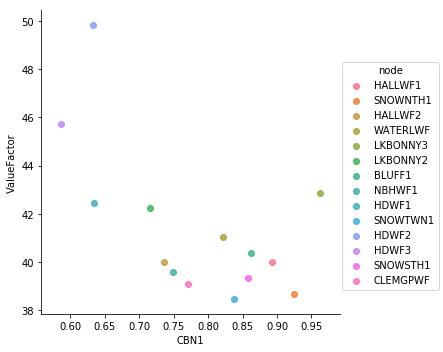

In [22]:
import seaborn as sns
sns.lmplot(data=df_central,x="CBN1",y="ValueFactor",hue="node",fit_reg=False)

# Value Factor decline in 2017 high correlation

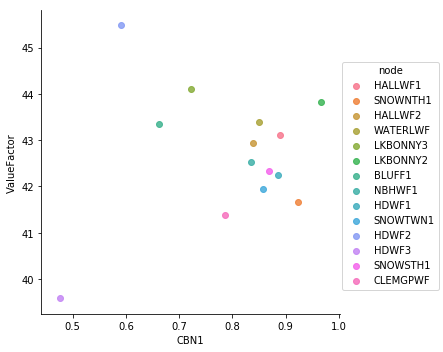

In [20]:
import seaborn as sns
sns.lmplot(data=df_central,x="CBN1",y="ValueFactor",hue="node",fit_reg=False)

# Value Factor decline new correlation

<IPython.core.display.Javascript object>


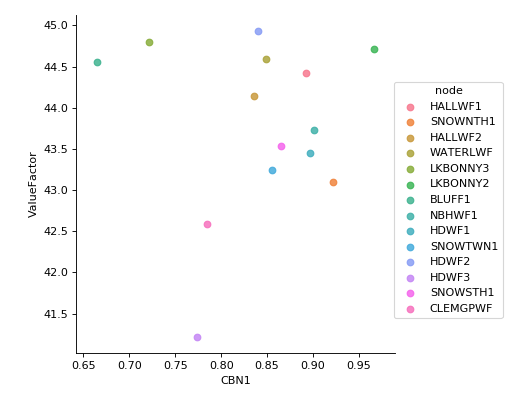

In [161]:
import seaborn as sns
sns.lmplot(data=df_central,x="CBN1",y="ValueFactor",hue="node",fit_reg=False)